# Quantum classification

In this notebook, we see the dependence of trainability of the QML classifier on the circuit structure and the cost function.

The circuit structure is defined by two parts: the embedding part, the ansatz part.
- embedding part: the embedding circuit to encode input data into the quantum circuit.
    There are 3 types of embedding circuits:
    - Tensor Product Embedding (TPE): the embedding circuit is the tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Embedding (HEE): the embedding circuit is the tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Classically Hard Embedding (CHE): the embedding circuit that is hard to simulate on classically.
- ansatz part: the parametrized circuit to learn the training dataset.
    There are 3 types of ansatz circuits:
    - Tensor Product Ansatz (TPA): the ansatz circuit is the tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Ansatz (HEA): the ansatz circuit is the tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Strongly Entangling Ansatz (SEA): the ansatz circuit that is strongly entangled.

On `HEE` and `CHE`, refer to [`Subtleties in the trainability of quantum machine learning models`](https://arxiv.org/abs/2110.14753) for more details.

On `SEA`, refer to PennyLnae page: [embedding and ansatz](https://pennylane.readthedocs.io/en/stable/introduction/templates.html)

## 1. Iris dataset with 2 features and 2 labels

In [1]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..')
from src.quantum_classification import *

In [2]:
data = np.loadtxt("../data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features out of 4
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [3]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


In [9]:
# settings
nqubits = X.shape[1]; embedding_nlayers = 1; ansatz_nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'TPA'; cost_type = 'MSE'
label = f'{embedding_type}, {ansatz_type}'

iris = QuantumClassifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

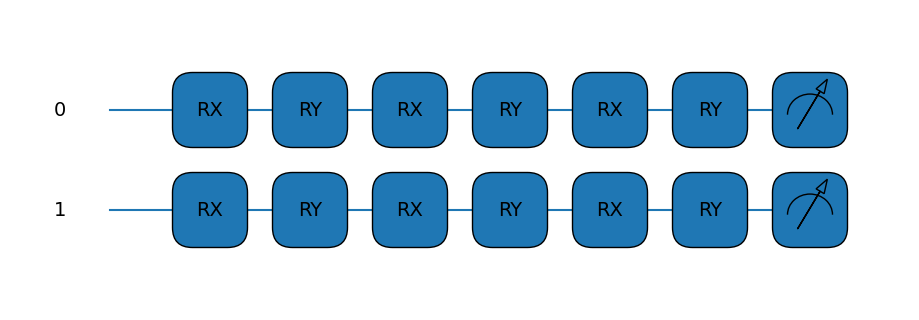

In [10]:
iris.draw_circuit()

In [11]:
iris.optimize()

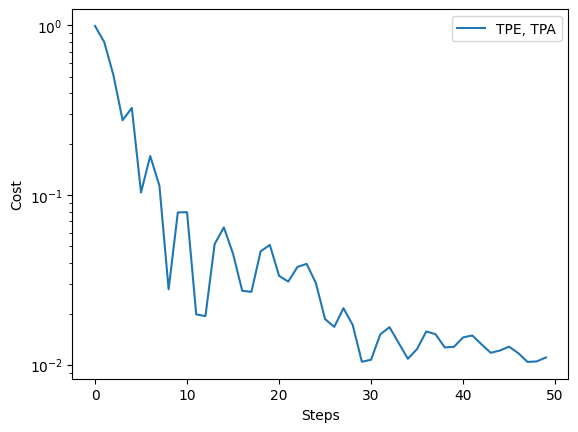

In [12]:
iris.plot_cost()

In [13]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.011041395087458421


In [4]:
# settings
nqubits = X.shape[1]; embedding_nlayers = 10; ansatz_nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'TPA'; cost_type = 'MSE'
label = f'{embedding_type}, {ansatz_type}'

iris = QuantumClassifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

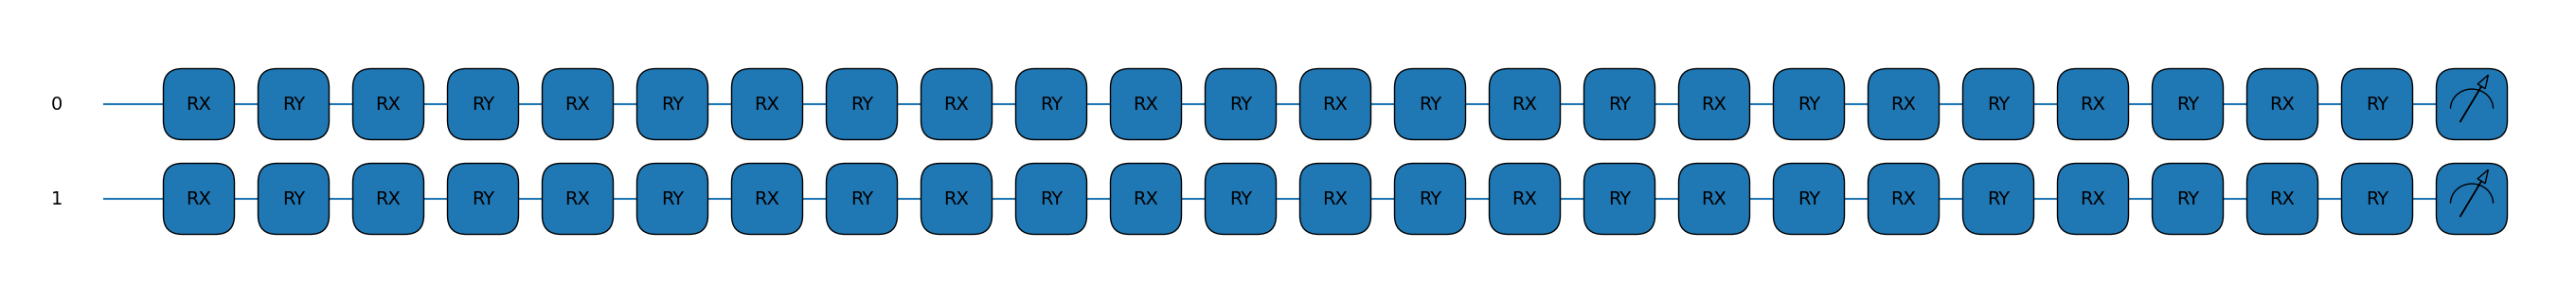

In [5]:
iris.draw_circuit()

In [6]:
iris.optimize()

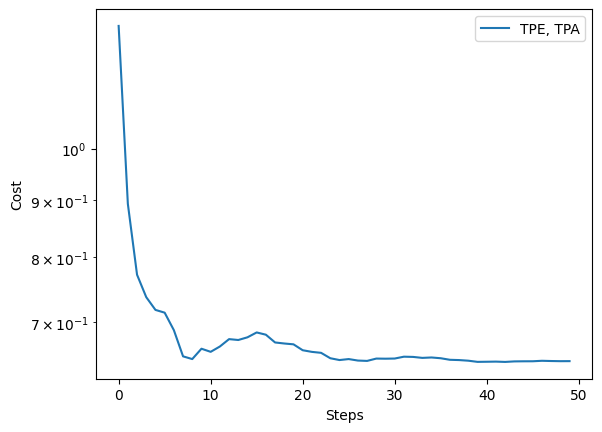

In [7]:
iris.plot_cost()

In [ ]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  0.5
optimized cost;  0.6463820034032833


## 2. Iris dataset with 4 features and 2 labels

In [ ]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..')
from src.quantum_classification import *

In [10]:
data = np.loadtxt("../data/iris_classes1and2_scaled.txt")
X = data[:,:4] # use first 4 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
for i in range(3):
    print(x_train[i], y_train[i])

[0.7  0.45 1.6  0.6 ] 1.0
[0.7  0.4  1.75 0.6 ] 1.0
[0.55 0.5  1.75 0.7 ] 1.0


In [12]:
# settings
nqubits = X.shape[1]; embedding_nlayers = 1; ansatz_nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = QuantumClassifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

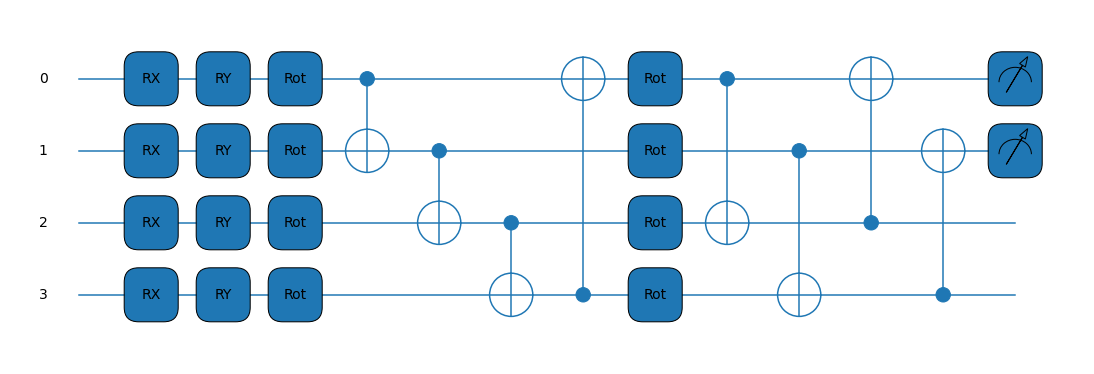

In [13]:
iris.draw_circuit()

In [14]:
iris.optimize()

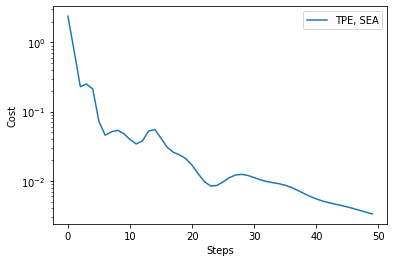

In [15]:
iris.plot_cost()

In [16]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.0033291152705294453


## 3. Another dataset (2 features and 4 labels)

In [40]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..')
from src.quantum_classification import *

In [41]:
N = 50
X = np.random.uniform(-1, 1, (N,2))
Y = np.zeros(N).astype(int)

for i,x in enumerate(X):
    if x[0] > 0:
        if x[1] > 0:
            Y[i] = 0
        else:
            Y[i] = 3
    else:
        if x[1] > 0:
            Y[i] = 1
        else:
            Y[i] = 2

print(X[:5])
print(Y[:5])

[[-0.25491844 -0.21993439]
 [ 0.39781532  0.18892273]
 [-0.0205408   0.93297304]
 [ 0.56330823 -0.48101951]
 [ 0.9612272  -0.63076441]]
[2 0 1 3 3]


In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# settings
nqubits = 4; embedding_nlayers = 1; ansatz_nlayers = 3; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

test = QuantumClassifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

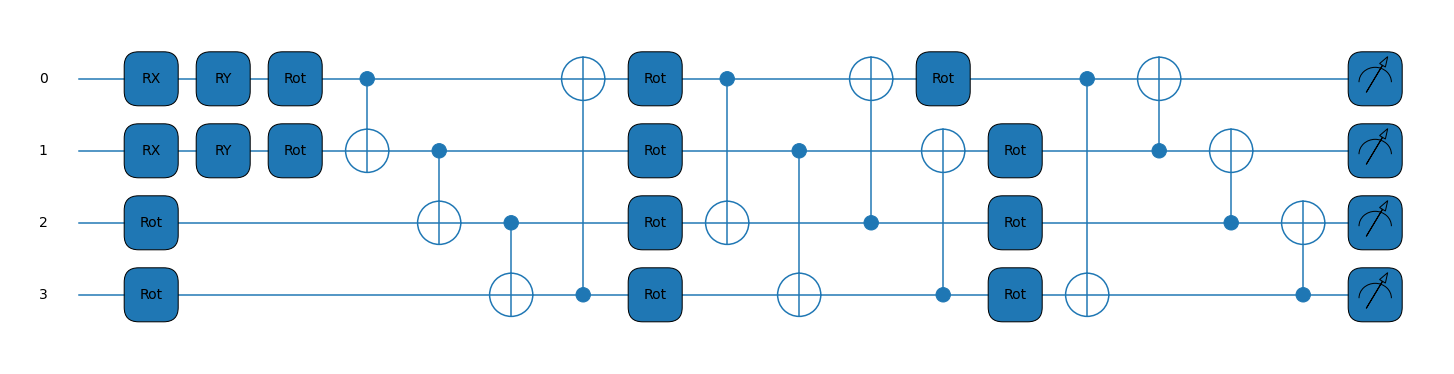

In [43]:
test.draw_circuit()

In [44]:
test.optimize()

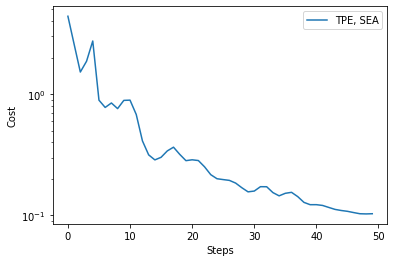

In [45]:
test.plot_cost()

In [46]:
print('accuracy ', test.accuracy(x_test, y_test))
print('optimized cost; ', test.cost_list[-1])

accuracy  1.0
optimized cost;  0.10318840190308216


## 4. Random dataset

In [49]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..')
from src.quantum_classification import *

In [50]:
N = 50
X = np.random.uniform(-1, 1, (N,2))
Y = np.random.randint(0, 2, N)

print(X[:5])
print(Y[:5])

[[-0.47031469  0.77095611]
 [ 0.15514777 -0.69061643]
 [-0.87699905  0.86032014]
 [-0.17457314  0.15020231]
 [ 0.01337038  0.96749464]]
[1 0 0 0 1]


In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# settings
nqubits = 4;  embedding_nlayers = 1; ansatz_nlayers = 3; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'MSE'
label = f'{embedding_type}, {ansatz_type}'

test = QuantumClassifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

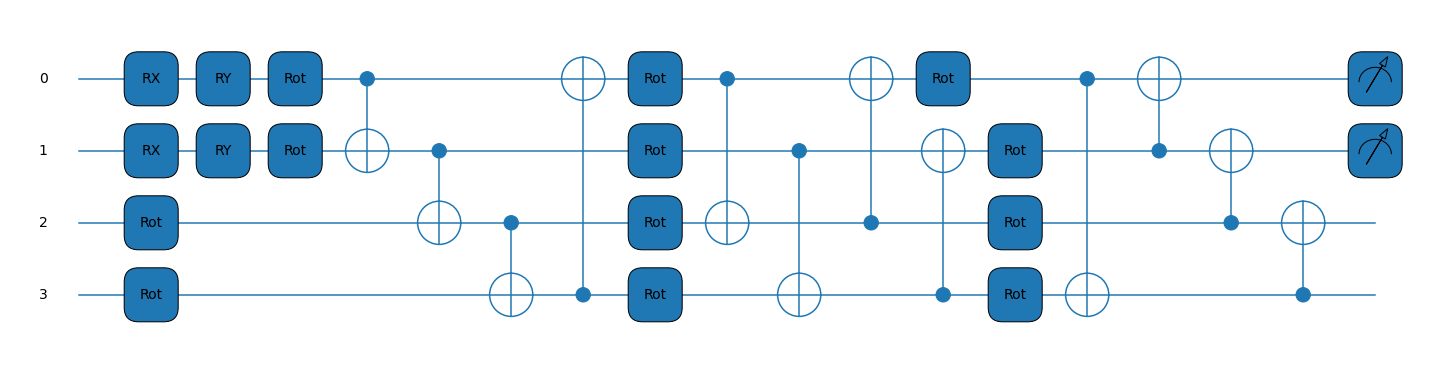

In [52]:
test.draw_circuit()

In [53]:
test.optimize()

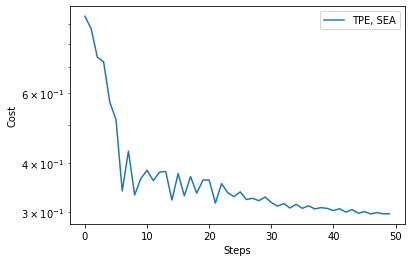

In [54]:
test.plot_cost()

In [55]:
print('accuracy ', test.accuracy(x_test, y_test))
print('optimized cost; ', test.cost_list[-1])

accuracy  0.6
optimized cost;  0.29753767595195185
